# Building Deep-Network Structures in pyhgf

This document demonstrates two new high-level functions for constructing layered, fully connected value-parent structures in `pyhgf`:

- **`add_value_parent_layer()`** – adds a *single* fully connected parent layer.  
- **`add_value_parent_stack()`** – builds *multiple* layers at once, similar to `Sequential` in deep-learning frameworks.

These functions allow HGF models to be composed in a deep-network style while remaining fully compatible with the probabilistic belief-update dynamics.

In [1]:
from pyhgf.model import Network

## Creating the Base Layer

We begin by defining a small bottom (input) layer of 4 continuous nodes:

In [2]:
net = Network().add_nodes(kind="continuous-state", n_nodes=4, precision=5.0)
bottom_idxs = list(range(4))

## Adding One Layer with `add_value_parent_layer`

`add_value_parent_layer` provides fine-grained control, letting you manually construct each layer.

This is useful when each layer should have different hyperparameters (precision, tonic volatility, autoconnection strength, etc.) The function creates a fully connected parent layer, where all new parent nodes connect to all children below them.

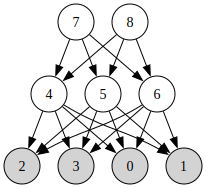

In [3]:
# Add a single parent layer of 3 nodes
net, layer1 = net.add_value_parent_layer(
    children_idxs=bottom_idxs,
    n_parents=3,
    precision=1.0,
    tonic_volatility=-1.0,
    autoconnection_strength=0.1,
)

# Now add a second parent layer of 2 nodes above the first parent layer, with different parameters
net, layer2 = net.add_value_parent_layer(
    children_idxs=layer1,
    n_parents=2,
    precision=0.5,
    tonic_volatility=-2.0,
    autoconnection_strength=1.0,
)

# Visualize the network structure
net.plot_network()

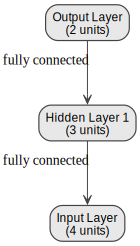

In [4]:
# Or alternatively, print a condensed network structure, showing only number of nodes in each layer (helpful for large networks)
layers = [bottom_idxs, layer1, layer2]
net.plot_deep_network(layers)

## Adding Multiple Layers with `add_value_parent_stack`

`add_value_parent_stack` provides a compact way to build several fully connected parent layers at once. Instead of adding each layer manually, you simply specify the desired layer sizes (e.g., [3, 16, 32]), and the function creates them sequentially. Each layer is fully connected to the one below, using the same hyperparameters for all layers you add (precision, tonic volatility, autoconnection strength, etc.).

This is ideal when you want to quickly prototype deep hierarchical networks or mimic the “stacked layer” construction found in deep learning frameworks.

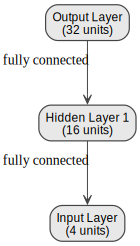

In [5]:
# Add 2 fully connected parent layers (4→3→2)
net, layers = net.add_value_parent_stack(
    start_children_idxs=bottom_idxs,
    layer_sizes=[4, 16, 32],
    precision=1.0,
    tonic_volatility=-1.0,
    autoconnection_strength=0.2,
)

net.plot_deep_network(layers)